# 16IT146 &emsp; &emsp;  &emsp;  &emsp;  &emsp;  &emsp;    IT441: Data Science

## **Practical 3 :Data Preprocessing(crowdness at the Gym at GYM Dataset): Missing Values, Variance Filter, Correlation Filter, Random forest, PCA, ICA** 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('data.csv') #Replace it with your path where the data file is stored
df.head()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,apparent_temperature,temperature,is_start_of_semester
0,0,11,5,1,0,63.0,63.0,0
1,0,906,5,1,0,63.0,63.0,0
2,0,1207,5,1,0,63.0,63.0,0
3,0,1507,5,1,0,63.0,63.0,0
4,0,1808,5,1,0,63.0,63.0,0


In [3]:
df.corr()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,apparent_temperature,temperature,is_start_of_semester
number_people,1.000000,0.516721,-0.198662,-0.212955,-0.023754,0.371589,0.365247,0.188743
timestamp,0.516721,1.000000,0.002188,0.005774,0.000015,0.135663,0.134209,-0.008029
day_of_week,-0.198662,0.002188,1.000000,0.795182,-0.090568,-0.011553,-0.011030,0.005801
is_weekend,-0.212955,0.005774,0.795182,1.000000,-0.069256,0.003095,0.003079,0.003434
is_holiday,-0.023754,0.000015,-0.090568,-0.069256,1.000000,-0.068055,-0.059206,0.083802
apparent_temperature,0.371589,0.135663,-0.011553,0.003095,-0.068055,1.000000,0.995839,0.092622
temperature,0.365247,0.134209,-0.011030,0.003079,-0.059206,0.995839,1.000000,0.092255
is_start_of_semester,0.188743,-0.008029,0.005801,0.003434,0.083802,0.092622,0.092255,1.000000


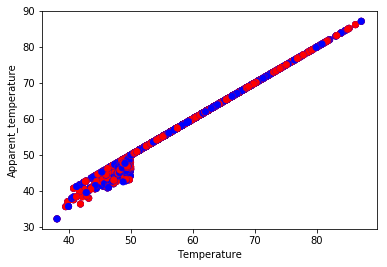

In [4]:
x=df['temperature']
y=df['apparent_temperature']
colors=('r','b')
plt.xlabel('Temperature')
plt.ylabel('Apparent_temperature')
plt.scatter(x,y,c=colors)

In [5]:
Fahrenheit=df['temperature']
F=Fahrenheit.tolist()
C= map(lambda x: (float(5)/9)*(x-32),F)
Celsius=(list(C))
temperature_celsius=pd.Series(Celsius)
df['temperature']= temperature_celsius
df['temperature']
df.head()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,apparent_temperature,temperature,is_start_of_semester
0,0,11,5,1,0,63.0,17.222222,0
1,0,906,5,1,0,63.0,17.222222,0
2,0,1207,5,1,0,63.0,17.222222,0
3,0,1507,5,1,0,63.0,17.222222,0
4,0,1808,5,1,0,63.0,17.222222,0


In [6]:
at_fahrenheit=df['apparent_temperature']
at_F=at_fahrenheit.tolist()
at_C= map(lambda x: (float(5)/9)*(x-32),at_F)
at_Celsius=(list(C))
at_celsius=pd.Series(at_Celsius)
at_celsius

Series([], dtype: float64)

In [7]:
apparent_temperature_celsius=pd.Series(at_Celsius)
print(apparent_temperature_celsius)

Series([], dtype: float64)


In [8]:
df['apparent_temperature']= temperature_celsius
df['apparent_temperature']
df.head()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,apparent_temperature,temperature,is_start_of_semester
0,0,11,5,1,0,17.222222,17.222222,0
1,0,906,5,1,0,17.222222,17.222222,0
2,0,1207,5,1,0,17.222222,17.222222,0
3,0,1507,5,1,0,17.222222,17.222222,0
4,0,1808,5,1,0,17.222222,17.222222,0


In [9]:
X = df.iloc[:,1:8]  # all rows, all the features and no labels
y = df.iloc[:, 0]  # all rows, label only

In [16]:
# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
for i in range(0, 4):
    X_train[:,i] = labelencoder_X.fit_transform(X_train[:,i])

array([[1, 0, 0, ..., 360.0, 1.0, 'Urban'],
       [1, 1, 1, ..., 360.0, 1.0, 'Rural'],
       [1, 1, 3, ..., 360.0, 1.0, 'Urban'],
       ...,
       [1, 1, 491, ..., 360.0, 1.0, 'Urban'],
       [1, 1, 492, ..., 360.0, 1.0, 'Urban'],
       [0, 0, 493, ..., 360.0, 0.0, 'Semiurban']], dtype=object)

# ** Applying PCA**

In [10]:
# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)
X

C:\Users\abhishek\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\abhishek\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-2.19905457,  0.98915621,  1.55803784, ...,  0.57637532,
         0.57637532, -0.33364584],
       [-2.15922689,  0.98915621,  1.55803784, ...,  0.57637532,
         0.57637532, -0.33364584],
       [-2.14583233,  0.98915621,  1.55803784, ...,  0.57637532,
         0.57637532, -0.33364584],
       ...,
       [ 0.10561101, -1.50425286, -0.64183293, ...,  0.57637532,
         0.57637532, -0.33364584],
       [ 0.5185284 , -1.50425286, -0.64183293, ...,  0.43526657,
         0.43526657, -0.33364584],
       [ 0.53183397, -1.50425286, -0.64183293, ...,  0.43526657,
         0.43526657, -0.33364584]])

In [11]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X)

array([[ 3.95611764e-01, -1.78081261e+00,  1.02236289e-01, ...,
         1.17716664e+00, -3.94275737e-01, -1.28620541e-16],
       [ 4.02568127e-01, -1.78093924e+00,  9.77413362e-02, ...,
         1.16422304e+00, -3.94238582e-01, -1.74481918e-16],
       [ 4.04907641e-01, -1.78098182e+00,  9.62296257e-02, ...,
         1.15986994e+00, -3.94226086e-01, -6.16006844e-17],
       ...,
       [ 7.77050910e-01,  1.49879167e+00, -4.86264267e-01, ...,
         1.39776045e-01, -6.04737810e-01,  2.07479466e-17],
       [ 6.54495059e-01,  1.49425867e+00, -5.29308255e-01, ...,
        -3.03595421e-02, -6.06178650e-01, -2.63591835e-17],
       [ 6.56819029e-01,  1.49421637e+00, -5.30809921e-01, ...,
        -3.46837172e-02, -6.06166237e-01,  1.36320501e-17]])

In [12]:
pca.get_covariance()

array([[ 1.00003837e+00,  2.18847717e-03,  5.77387502e-03,
         1.50149876e-05,  1.34214105e-01,  1.34214105e-01,
        -8.02916199e-03],
       [ 2.18847717e-03,  1.00003837e+00,  7.95212311e-01,
        -9.05719378e-02, -1.10306712e-02, -1.10306712e-02,
         5.80085557e-03],
       [ 5.77387502e-03,  7.95212311e-01,  1.00003837e+00,
        -6.92589313e-02,  3.07870155e-03,  3.07870155e-03,
         3.43424204e-03],
       [ 1.50149876e-05, -9.05719378e-02, -6.92589313e-02,
         1.00003837e+00, -5.92082493e-02, -5.92082493e-02,
         8.38049190e-02],
       [ 1.34214105e-01, -1.10306712e-02,  3.07870155e-03,
        -5.92082493e-02,  1.00003837e+00,  1.00003837e+00,
         9.22584738e-02],
       [ 1.34214105e-01, -1.10306712e-02,  3.07870155e-03,
        -5.92082493e-02,  1.00003837e+00,  1.00003837e+00,
         9.22584738e-02],
       [-8.02916199e-03,  5.80085557e-03,  3.43424204e-03,
         8.38049190e-02,  9.22584738e-02,  9.22584738e-02,
         1.0000383

In [13]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([2.93596458e-01, 2.58705412e-01, 1.53764974e-01, 1.39472742e-01,
       1.25265477e-01, 2.91949375e-02, 5.90961160e-34])

In [14]:
pca=PCA(n_components=5)
X_new=pca.fit_transform(X)
X_new

array([[ 0.39561176, -1.78081261,  0.10223629, -2.03708214,  1.17716664],
       [ 0.40256813, -1.78093924,  0.09774134, -2.0003385 ,  1.16422304],
       [ 0.40490764, -1.78098182,  0.09622963, -1.98798115,  1.15986994],
       ...,
       [ 0.77705091,  1.49879167, -0.48626427, -0.03710784,  0.13977604],
       [ 0.65449506,  1.49425867, -0.52930826,  0.36845679, -0.03035954],
       [ 0.65681903,  1.49421637, -0.53080992,  0.38073204, -0.03468372]])

In [15]:
pca.get_covariance()

array([[ 1.00003828e+00,  2.12098400e-03,  5.84116075e-03,
         1.30391070e-05,  1.34213488e-01,  1.34213488e-01,
        -8.02861009e-03],
       [ 2.12098400e-03,  9.48816063e-01,  8.46277185e-01,
        -9.20714845e-02, -1.14987882e-02, -1.14987882e-02,
         6.21970851e-03],
       [ 5.84116075e-03,  8.46277185e-01,  9.49130436e-01,
        -6.77639933e-02,  3.54537976e-03,  3.54537976e-03,
         3.01667641e-03],
       [ 1.30391070e-05, -9.20714845e-02, -6.77639933e-02,
         9.99994466e-01, -5.92219535e-02, -5.92219535e-02,
         8.38171810e-02],
       [ 1.34213488e-01, -1.14987882e-02,  3.54537976e-03,
        -5.92219535e-02,  1.05112719e+00,  9.48940987e-01,
         9.22623017e-02],
       [ 1.34213488e-01, -1.14987882e-02,  3.54537976e-03,
        -5.92219535e-02,  9.48940987e-01,  1.05112719e+00,
         9.22623017e-02],
       [-8.02861009e-03,  6.21970851e-03,  3.01667641e-03,
         8.38171810e-02,  9.22623017e-02,  9.22623017e-02,
         1.0000349

In [16]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.29359646, 0.25870541, 0.15376497, 0.13947274, 0.12526548])

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape

(20852, 7)

**Random** **Forest**

In [18]:
# Establish model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [20]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print(scores)  

[0.8552260645962537, 0.8678052619361432, 0.8693985790238696, 0.8690819423461404, 0.8704181172013887, 0.8725863980161301, 0.8718128289573565, 0.8725241223424407, 0.8718121830366408, 0.8726643689824797, 0.8742796303177602, 0.8735925976933141, 0.8733742593569955, 0.8727518801635978, 0.8736656650482865, 0.8745957020076269, 0.8732855819892373, 0.8745550194484808, 0.8735772679043736]


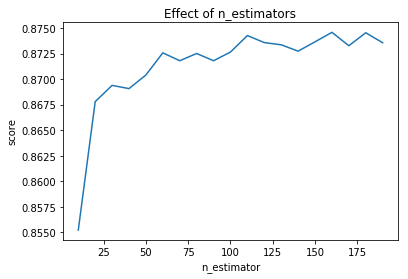

In [21]:
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=1)
X_train.shape

(20852, 5)

In [23]:
# Establish model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [24]:
# Try different numbers of n_estimators - this will take a minute or so
estimators = np.arange(10, 200, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
print(scores) 

[0.8039600990875807, 0.8146312349700945, 0.8169260920543113, 0.81807425159499, 0.8179701005459696, 0.8192898731714059, 0.8201598128555196, 0.82009590257829, 0.8197794437456177, 0.8198982729607751, 0.8193324173806913, 0.8212366437945917, 0.8206300416441097, 0.8202916406598408, 0.8207362664059309, 0.820241486561452, 0.8217046456544191, 0.8215732246302467, 0.8215505276809292]


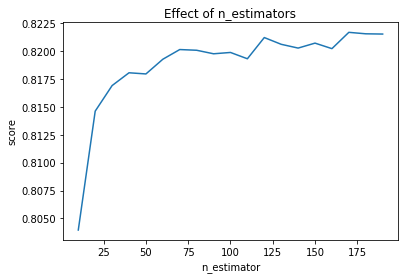

In [25]:
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

**Conclusion :** In this practical, I've performed data pre-processing techniques like filters, PCA and random forest on crowdness at the Gym data .